# Analisi dati acquisiti dai sensori nella configurazione a 7 sensori

Il dataset _"20210102_alldata"_ include tutte le misure acquisite in data 2021-01-02 con il sistema assemblato in configurazione a 7 sensori. Le distanze orizzontali e verticali tra i sensori ed il bersaglio in tutti gli esperimenti erano comprese tra 5cm e 60 cm. 

## Univariate Plots

     HCSR04_001  HCSR04_002  HCSR04_003  HCSR04_004  HCSR04_005  HCSR04_006  \
0         53.25       54.19       56.01       53.70       50.57       51.90   
1         53.21       54.23       55.98       53.70       50.49       51.39   
2         53.16       54.62       56.41       53.72       50.11       51.91   
3         53.18       54.64       56.03       53.70       50.49       51.44   
4         53.31       54.58       56.39       53.63       50.11       51.40   
..          ...         ...         ...         ...         ...         ...   
496       40.35       19.25       38.56       49.12       30.85       57.15   
497       40.43       19.68       38.56       49.96       30.86       57.93   
498       40.34       19.70       38.49       49.44       30.91       57.62   
499       40.42       19.70       38.51       49.69       30.90       57.91   
500       40.30       19.31       38.57       49.14       30.96       57.53   

     HCSR04_007     ObjectClass  
0         23.33  

<ipython-input-20-072da6ca0a91>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.iloc[:,0:6].hist(ax = ax)


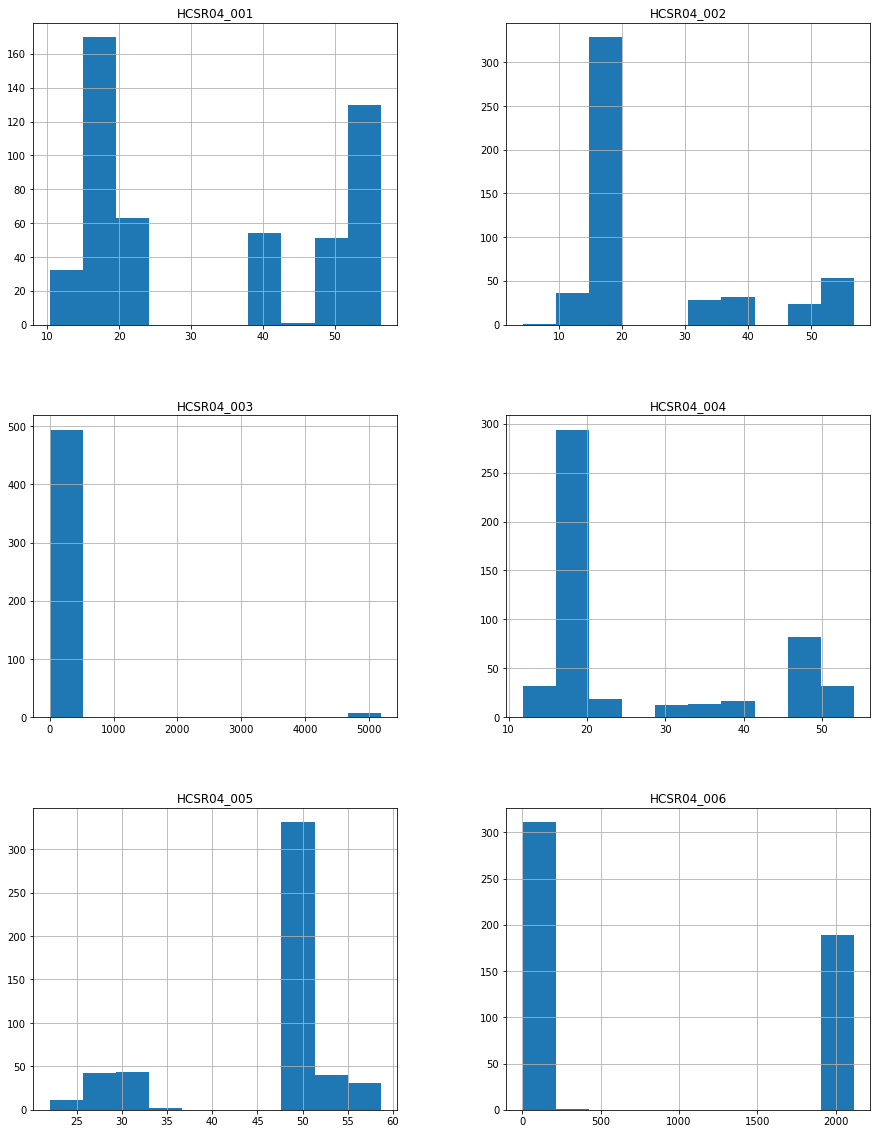

In [20]:
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/emanbuc/ultrasonic-vision/main/dataset/20210102_alldata.csv"

names = ['HCSR04_001', 'HCSR04_002', 'HCSR04_003', 'HCSR04_004', 'HCSR04_005', 'HCSR04_006', 'HCSR04_007','ObjectClass']
data = pandas.read_csv(url, usecols=names)
print(data)
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.iloc[:,0:6].hist(ax = ax)
plt.show()

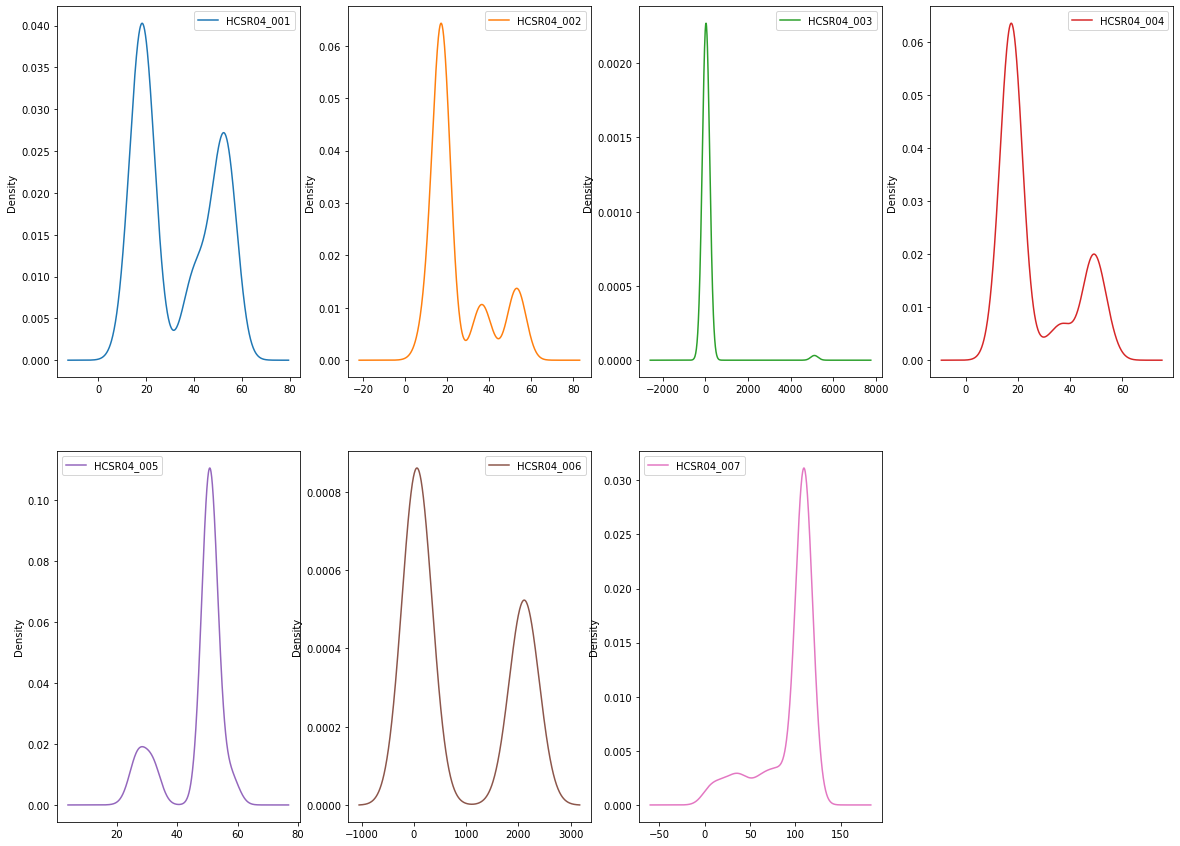

In [15]:
data.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(20,15))
plt.show()

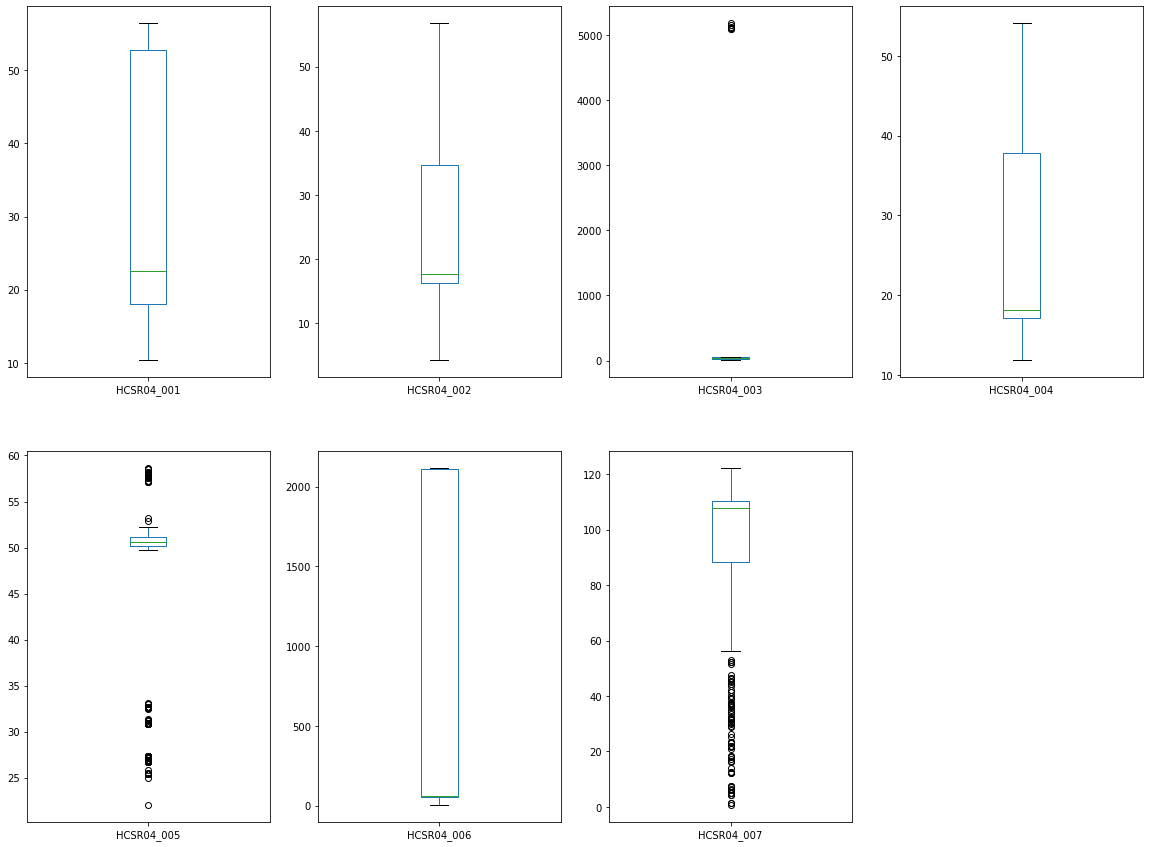

In [16]:
data.plot(kind='box', subplots=True, layout=(2,4), figsize=(20,15))
plt.show()

I grafici mostrano che molti sensori hanno restituito misure fuori range e che sono presenti numerosi _outlier_. Per comprendere meglio la natura delle anomalie sono state poi analizzate le misure raggruppandole in base al tipo di oggetto presente all'interno dell'area di misura.


In [17]:
groupedByClass = data.groupby(['ObjectClass'])
groupedByClass.first()

,HCSR04_001,HCSR04_002,HCSR04_003,HCSR04_004,HCSR04_005,HCSR04_006,HCSR04_007
ObjectClass,,,,,,,
BALL_CENTER,55.59,16.09,54.78,17.55,51.73,57.48,96.38
BEAN_CAN,52.81,15.54,3.97,19.05,50.48,2115.51,109.24
BEER_BOTTLE,18.98,18.62,18.80,18.79,50.78,119.22,111.96
EMPTY_SEVEN,53.25,54.19,56.01,53.70,50.57,51.90,23.33
GLASS,53.25,18.50,22.04,17.39,49.88,2114.98,104.41
RECTANGULAR_BOX,48.56,50.96,14.53,30.73,27.14,25.80,96.35
RECTANGULAR_BOX_SIDE,10.36,4.26,35.71,12.94,22.03,23.99,122.23
SOAP_BOTTLE_FRONT,16.99,15.77,15.69,16.25,50.74,2115.85,111.68
SOAP_BOTTLE_SIDE,19.46,53.24,33.39,18.03,50.87,2114.00,107.46



## Analisi dati esperimento senza oggetto (Label = "EMPTY_SEVEN")

Per prima cosa sono state esaminati i risultati di tutte le ripetizioni dell'esperimento **EMPTY_SEVEN**. In questo esperimento nell'area di misura non era presente nessun oggetto, ma solo i pannelli di delimitazione paralleli al piano frontale dei sensori 001, 002, 003, 004 ad un distanza di circa 55 cm. Il pannello superiore che ospita i sensori 005, 006 e 007 è montato ad una altezza di circa 50 cm rispetto al piano al pavimento dell'area di misurazione

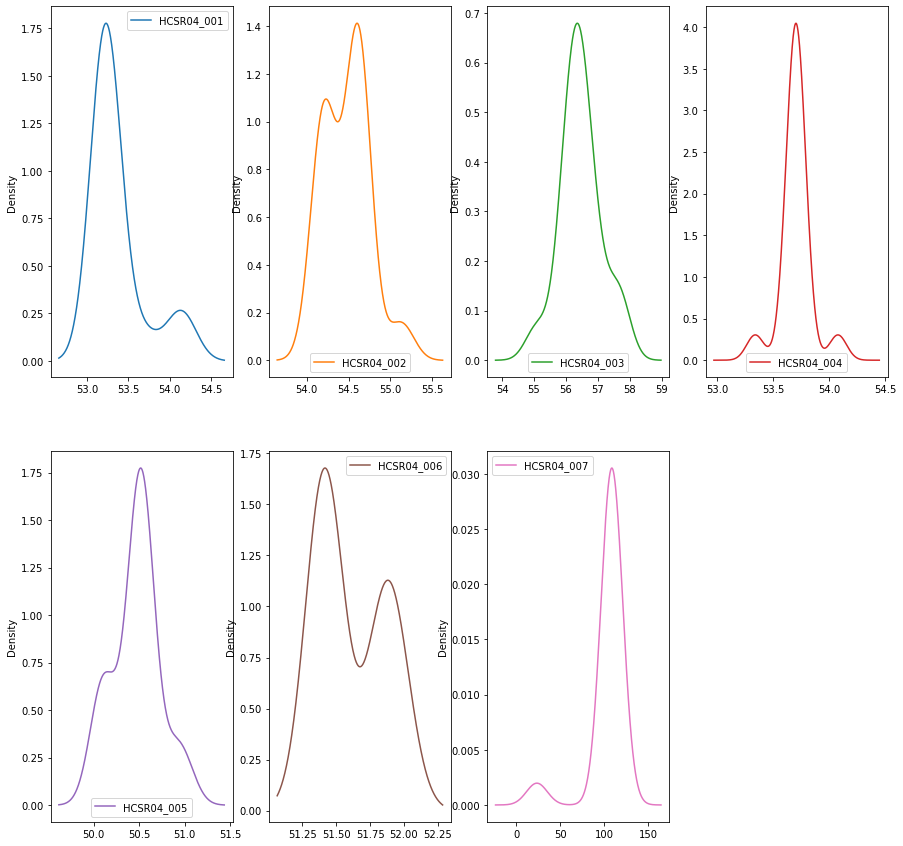

In [24]:
df_EMPTY_SEVEN = groupedByClass.get_group('EMPTY_SEVEN')
df_EMPTY_SEVEN.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(15,15))
plt.show()

Il sensore *HC-SR-04_007* è affetto da un errore sistematico che sposta il picco della distribuzione da 50 a 100 cm circa. La causa del problema non è stata individuata, ma alcuni esperimenti specifici hanno mostrato che la misura del tempo di volo fornita è comunque fortemente correlata alla distanza del bersaglio dal sensore. La distanza stimata da HC-SR-04_007 contiene quindi informazione utile e i dati prodotti non sono stati scartati.

Tutti gli altri sensori forniscono un stima della distanza compatibile con la precisione del sensore (+/- 3cm). Rimangono quindi da individuare le cause delle altre anomalie presenti nei dati degli atri esperiementi. 


## Analisi dati altri esperimenti

Il dataset include i dati raccolti posizionando diversi tipi oggetti all'interno dell'area di misura approssimativamente nella stessa posizione. Gli esperimenti sono stai ripetuti più volte riposizionando ogni volta l'oggetto. Ad ogni ripetizione l'oggetto è stato posizionato in una posizione leggermente diversa da quella precedente, in modo da produrre un dataset di addestramento più simile alle condizioni operative del sistema in produzione.

I sensori utilizzati "vedono" gli oggetti all'interno di un cono di circa 15°.
All'interfaccia ARIA-OGGETTO le onde sonore incidenti generano on onda riflessa che si propaga con un direzione che dipende dall'angolo di incidenza (legge di Snell) 


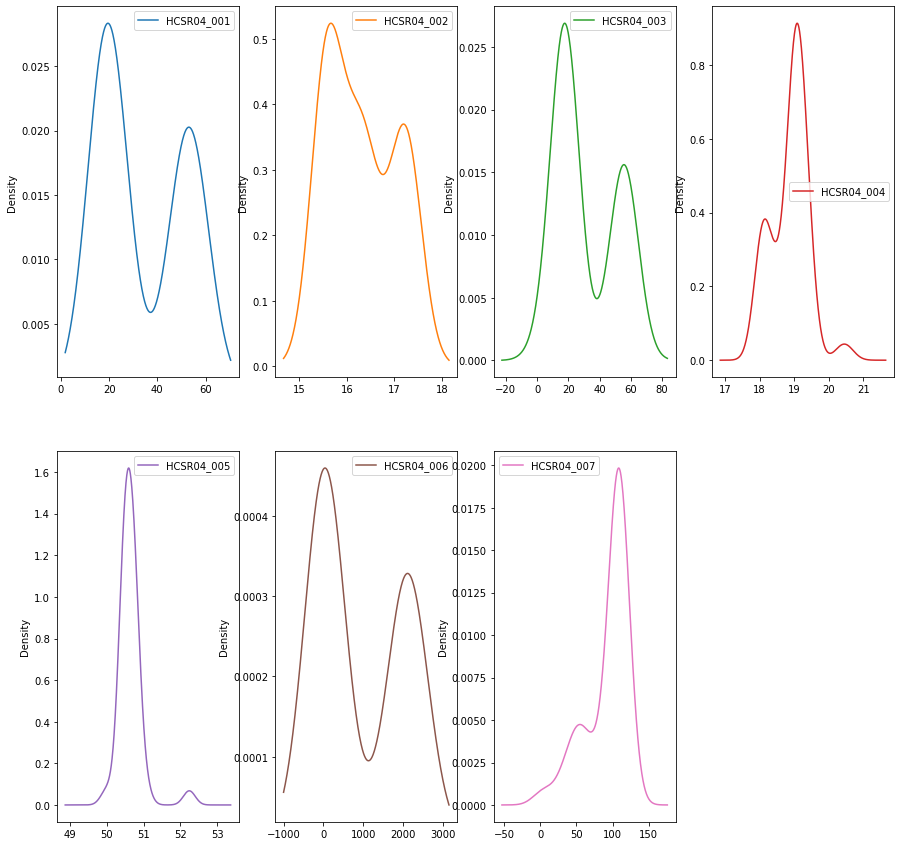

In [27]:
df_EMPTY_SEVEN = groupedByClass.get_group('BEAN_CAN')
df_EMPTY_SEVEN.plot(kind='density', subplots=True, layout=(2,4), sharex=False, figsize=(15,15))
plt.show()